#  import the important libraries

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_style("darkgrid")


In [2]:
# Configuration parameters for data visualization
plt.rcParams["figure.figsize"] = (10, 6)  # Set the default figure size
plt.rcParams["font.size"] = 12  # Set the default font size
plt.rcParams["axes.titlesize"] = 16  # Set the title font size
plt.rcParams["axes.labelsize"] = 14  # Set the label font size
plt.rcParams["xtick.labelsize"] = 12  # Set the x-axis tick label font size
plt.rcParams["ytick.labelsize"] = 12  # Set the y-axis tick label font size
plt.rcParams["legend.fontsize"] = 12  # Set the legend font size

plt.rcParams["axes.grid"] = True  # Show gridlines in the plot
plt.rcParams["grid.linestyle"] = "--"

# import the data

In [3]:
data=pd.read_csv("Default_Fin.csv")

# Data preprocessing and cleaning

In [4]:
#check the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [5]:
#convert the column to lower case and remove the space
data.columns=data.columns.str.lower()
data.columns=data.columns.str.replace(" ",'_')

In [6]:
data.duplicated().sum()

0

In [7]:
data.head()

,index,employed,bank_balance,annual_salary,defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [8]:
data.describe()

,index,employed,bank_balance,annual_salary,defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [9]:
data.drop("index",axis=1,inplace=True)

In [10]:
def create_hist_plots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns

    fig, axes = plt.subplots(1, len(num_columns), figsize=(15, 6))
    fig.tight_layout(pad=4.0)

    for idx, column in enumerate(num_columns):
        ax = axes[idx] if len(num_columns) > 1 else axes  # Handle single subplot case
        sns.histplot(dataframe[column], kde=True, ax=ax)
        ax.set_title(f'Histogram of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

    plt.show()

    
def create_box_plots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns

    fig, axes = plt.subplots(1, len(num_columns), figsize=(15, 6))
    fig.tight_layout(pad=4.0)

    for idx, column in enumerate(num_columns):
        ax = axes[idx]
        dataframe.boxplot(column=column, ax=ax)
        ax.set_title(f'Box Plot of {column}')
        ax.set_ylabel(column)

    plt.show()



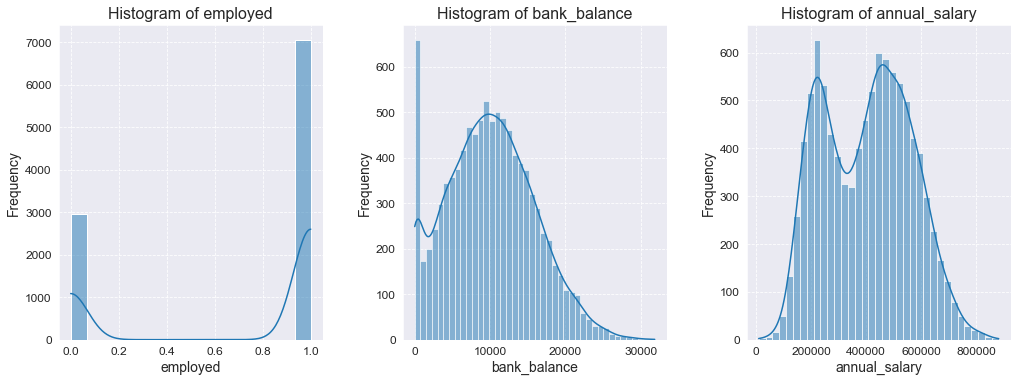

In [11]:
create_hist_plots(data.drop("defaulted?",axis=1))

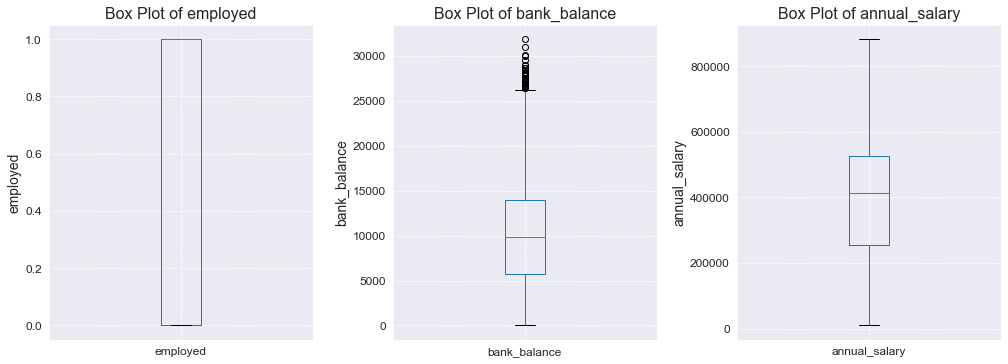

In [12]:
create_box_plots(data.drop("defaulted?",axis=1))

In [13]:
from scipy.stats import shapiro


In [14]:
stats,p=shapiro(data['bank_balance'])
if p>0.05:
    print("Normal distribution")
else:
    print("Not a normal distribution")

Not a normal distribution


In [15]:
def remove_outliers_iqr(dataframe, column_name, lower_percentile=25, upper_percentile=75, multiplier=1.5):
    # Calculate the IQR and boundaries
    q1 = dataframe[column_name].quantile(lower_percentile / 100)
    q3 = dataframe[column_name].quantile(upper_percentile / 100)
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr

    # Filter out the outliers
    filtered_data = dataframe[(dataframe[column_name] >= lower_bound) & (dataframe[column_name] <= upper_bound)]
    
    return filtered_data


In [16]:
data=remove_outliers_iqr(data,'bank_balance')

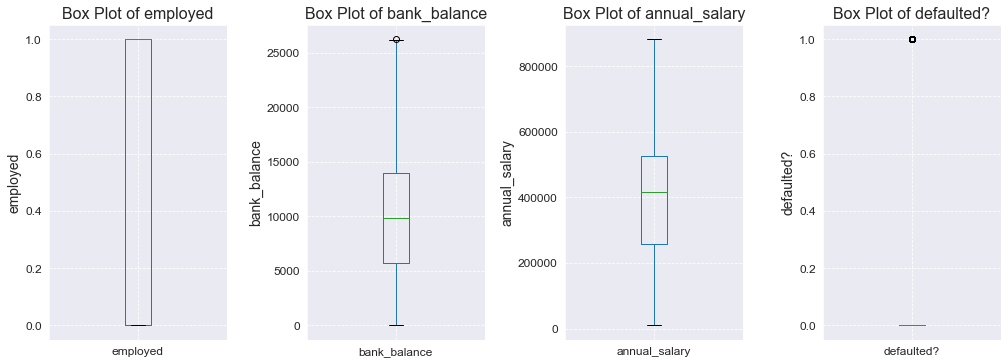

In [17]:
create_box_plots(data)

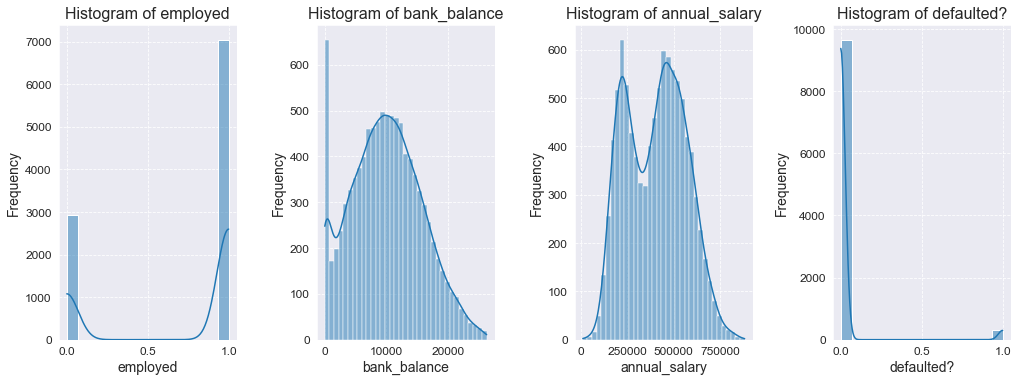

In [18]:
create_hist_plots(data)

In [19]:
stats,p=shapiro(data['annual_salary'])
if p>0.05:
    print("Normal distribution")
else:
    print("Not a normal distribution")

Not a normal distribution


In [20]:
data

,employed,bank_balance,annual_salary,defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


<AxesSubplot:>

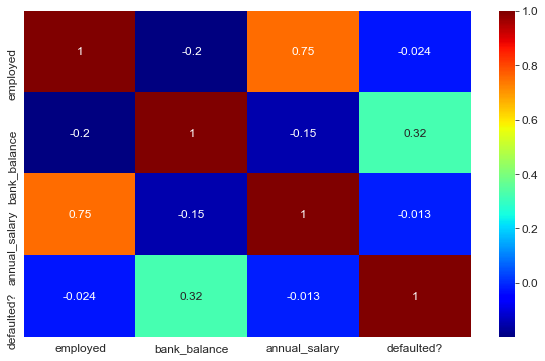

In [21]:
sns.heatmap(data.corr(),annot=True,cmap='jet')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9969 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   employed       9969 non-null   int64  
 1   bank_balance   9969 non-null   float64
 2   annual_salary  9969 non-null   float64
 3   defaulted?     9969 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 389.4 KB


In [23]:
data['defaulted?'].value_counts()

0    9662
1     307
Name: defaulted?, dtype: int64

In [24]:
data

,employed,bank_balance,annual_salary,defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0
...,...,...,...,...
9995,1,8538.72,635908.56,0
9996,1,9095.52,235928.64,0
9997,1,10144.92,703633.92,0
9998,1,18828.12,440029.32,0


In [25]:
X=data.drop('defaulted?',axis=1)
y=data['defaulted?']

In [26]:
X=pd.get_dummies(data=X,columns=["employed"],drop_first=True)

In [27]:
!pip install --user imblearn

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
smote=SMOTE()

In [30]:
from sklearn.model_selection import  train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=45)

In [32]:
X_train,y_train=smote.fit_resample(X_train,y_train)

In [33]:
y_train.value_counts()

0    6762
1    6762
Name: defaulted?, dtype: int64

In [34]:
from sklearn.ensemble import RandomForestClassifier 

In [35]:
model=RandomForestClassifier()

In [36]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
y_pred=model.predict(X_test)

In [45]:
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score,confusion_matrix

In [39]:
accuracy_score(y_test,y_pred)

0.8886659979939819

In [42]:
recall_score(y_test,y_pred)

0.6703296703296703